In [2]:
# install dependencies
!pip install forcelayout

In [8]:
from poker_utils import load_poker, annotate_poker, poker_distance
import matplotlib.pyplot as plt
import forcelayout as fl

dataset = load_poker(500)

The form of a single poker hand in the poker hands dataset:

In [9]:
dataset[0]
dataset[1]

array([ 3, 12,  3,  2,  3, 11,  4,  5,  2,  5,  1], dtype=int16)

Create a layout using the Pivot Layout algorithm and the poker distance metric:

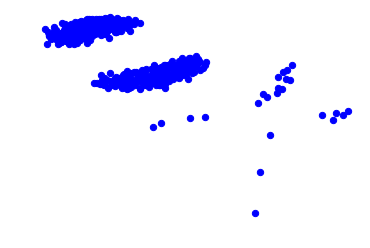

In [7]:
fl.draw_spring_layout(dataset, algorithm=fl.Pivot, distance=poker_distance)
plt.show()

Let's colour this by the class of the poker hand...

In [ ]:
layout = fl.draw_spring_layout(dataset, algorithm=fl.Pivot, distance=poker_distance,
                               color_by=lambda datapoint: datapoint[10])

We can redraw a layout as many times as we want with different settings

In [ ]:
draw = fl.DrawLayout(dataset, layout)
draw.draw(color_by=lambda datapoint: datapoint[10], color_map='hsv')

Create an animation of the Chalmers' 1996 algorithm: (this will take longer than the Pivot algorithm)

In [ ]:
from IPython.display import HTML


ani = fl.draw_spring_layout_animated(dataset, distance=poker_distance, interval=100,
                                     color_by=lambda datapoint: datapoint[10])
HTML(ani.to_html5_video())

We can animate the Pivot algorithm too:

In [ ]:
ani = fl.draw_spring_layout_animated(dataset, algorithm=fl.Pivot, distance=poker_distance, interval=100,
                                     color_by=lambda datapoint: datapoint[10])
HTML(ani.to_html5_video())

How about a big layout, 10,000?

In [ ]:
import time
big_poker = load_poker(10000)

start = time.time()
layout = fl.draw_spring_layout(big_poker, algorithm=fl.Pivot, distance=poker_distance,
                               hybrid_refine_layout_iterations=0, size=10,
                               color_by=lambda datapoint: datapoint[10])
print(f'\ntime: {time.time() - start}s')
plt.show()

Every poker hand: 2.5 million (**warning** will take several hours)

In [ ]:
bigger_poker = load_poker(2500000)

start = time.time()
layout = fl.draw_spring_layout(bigger_poker, algorithm=fl.Pivot, distance=poker_distance,
                               hybrid_refine_layout_iterations=0, size=0.5,
                               color_by=lambda datapoint: datapoint[10])
print(f'\ntime: {time.time() - start}s')
plt.show()